This report is to analyze the July transaction records of a car rental company that provides both short time period rental and long time period rental. Out goal is to find out some useful information that can help this company to increase its profit or to explore the possibilities for one-way approach. 

I am using python 2.7.x to analyze the July dataset that contains 1877 rows and 42 columns.

We have two target variables, total cost and membership types. We will examine how the changes of other independent variabls affect the performance of these two target variables.

Typically, we will focus on solving the below quesitons:


a. The correlation between cost of trip and trip profile (trip length, time of day, mileage, station, etc).

b. The correlation of trip profiles and membership plan types.

c. How many trips are taken at each time interval at each location.



In [1]:
import numpy as np        # linear algebra
import pandas as pd       # data processing, CSV file I/O (e.g. pd.read_csv())
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns       # data visualization
import datetime        # process date and time objects

color = sns.color_palette()
sns.set_style('whitegrid')

F:\Anaconda3\envs\gl-env\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
xls = pd.ExcelFile("July.xls")
train_df = xls.parse('Usages') # Read the selected sheet by sheet name
train_df = pd.DataFrame(train_df) # Convert dataset to DataFrame that is easier to manipylate in futher analysis

print('Loading July dataset...')
print('July dataset shape: ')
print(train_df.shape)
print('July dataset data types: ')
print(train_df.dtypes)
# print('The first few rows of July dataset : ')
# print(train_df.head())
print('Summary of July dataset : ')
print(train_df.describe())
train_df_null = train_df.isnull().sum()
print('The ratio of missing values in each column : ')  
print(train_df_null/train_df.shape[0])


Loading July dataset...
July dataset shape: 
(1877, 42)
July dataset data types: 
Reservation Number                 float64
Company number                     float64
Title                              float64
ZIP Code                            object
Vehicle                             object
License Plate                       object
Location                            object
City                                object
Category                            object
Reservation Made (UTC)      datetime64[ns]
Usage Start (Local time)    datetime64[ns]
Usage Start (UTC time)      datetime64[ns]
Usage Until (Local time)    datetime64[ns]
Usage Until (UTC time)      datetime64[ns]
Time Zone                           object
Reservation From            datetime64[ns]
Reservation Until           datetime64[ns]
mi.                                  int64
Odometer trip start                float64
Odometer trip end                  float64
Fuel level at trip end             float64
Reservation Typ

We see that there is a 13.7% percentage missing values for memerbship plan types and 18.5% percentage missing values for total cost. From the data summary, we found that the mean of total cost is $28 while the standard deviation is 32.4 and the maximun is $350, which means it is not appropriate to replace the total coast missing values with mean value. We can future prove it by ploting the total cost boxplot.

In [316]:
# Rename the columns
train_df['Membership_types'] = train_df['Customer Tariff']
train_df['ZIP_Code'] = train_df['ZIP Code']
train_df['Reservation_made_time'] = train_df['Reservation Made (UTC)']
train_df['Reservation_From'] = train_df['Reservation From']
train_df['Reservation_Until'] = train_df['Reservation Until']
train_df['Reservation_length'] = train_df['Reservation_Until'] - train_df['Reservation_From'] 
train_df['Trip_Start'] = train_df['Trip Start']
train_df['Trip_End'] = train_df['Trip End']
train_df['Trip_length'] = train_df['Trip_End'] - train_df['Trip_Start']
train_df['Trip_Mileage']  = train_df['Trip Mileage ']

Time_Cost = train_df['Time Cost']
Fees = train_df['Fees']
Mileage_cost = train_df['Mileage cost']
train_df['Total_cost'] = Time_Cost + Fees + Mileage_cost
Total_cost = train_df['Total_cost']

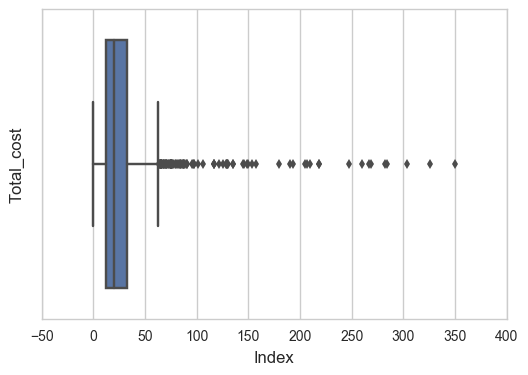

In [317]:
# now let's do some visualizaion on the training dataset
sns.boxplot(x=train_df.Total_cost.values)
# plt.xlim(-10,250)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total_cost', fontsize=12)
plt.show()

We can see that there is a large change in the range of total cost, which means there are a lot of outliers.
So we can not just simply replace those missing values with mean or either median.
Moreover, total contains three variables, time cost, fees and mileage cost. So it will be complicated to impute 
those missing values. So at current stage, I will drop those missing values for better accuracy.

U of M Plan                        449
Voyager Annual Plan                300
Voyager Monthly Plan               266
Freedom Plan                       224
Go Plan                            149
Student Plan                        88
Non-Profit Plan (Tax-Exempt)        29
Neighborhood Monthly Plan           26
Business Plan                       20
Non-Profit Plan                     20
Neighborhood Annual Plan            17
Go Non-Profit Plan                  12
Billable Exempt                     12
Roaming Plan                         6
Go Non-Profit Plan (Tax-Exempt)      1
Name: Membership_types, dtype: int64


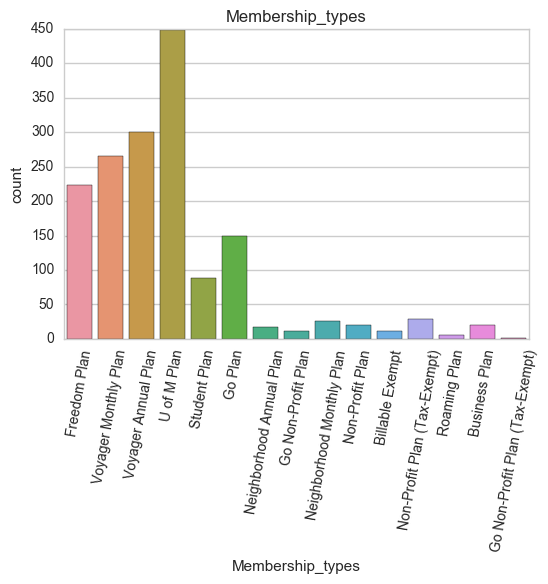

In [318]:
Membership_types_cnt = train_df['Membership_types'].value_counts()
print(Membership_types_cnt)

sns.countplot(x='Membership_types', data=train_df)
plt.xticks(rotation=80)
plt.xlabel('Membership_types')
plt.title('Membership_types')
plt.show()

From the count plot of membership plan types, this company provides more than ten types of mermbership plans. Among there plans, only five of  them have trips taken more than 150 times while others contain less than 50 times trips. So it is hard to figure out to which the missing plan types should belongs. Same as total cost, I will drop those missing values for better accuracy.

Among all the membership_types, six of them are relatively popular, there are Freedom Plan, Student Plan, Voyager Annual Plan, Voyager Monthly Plan, U of M Plan and Go Plan. So Hourcar can spend more forces on promoting these six plans. 

U of M Students, Faculty & Staff are the most largest customers, so U of M Plan is the most popular one. For individuals, Voyager Plan is the most polular. But I checked HOURCAR website that Neighborthood Plan is advertising as important as Voyager Plan, maybe HOURCAR need to think why customers do not prefer to register Neighborthood Plan.

Moreover, we can see that some of the plans has fewer than 20 people, so they might need to think if it is necessary to keep
those plans based on how much they make. 

A better way is that they can streamline the plans into fewer alternatives. Which makes it easier for customer to choose
While they surf the website.

In [319]:
# Now we are going to form out target dataset by selecting some independent varialbs.
columns = ['Total_cost', 'Membership_types','ZIP_Code','Reservation_made_time','Reservation_length','Trip_length', 'Trip_Mileage','City','Location','Reservation_From','Reservation_Until']
train_july = pd.DataFrame(train_df, columns=columns)
train_july_null = train_july.isnull().sum()
print(train_july_null)
# Drop the missing values
train_july = train_july.dropna() 
train_july_null = train_july.isnull().sum()
print(train_july_null)
print('HOURCAR July dataset shape after remove missing values: ')
print(train_july.shape)


Total_cost               348
Membership_types         258
ZIP_Code                  14
Reservation_made_time     12
Reservation_length        12
Trip_length              148
Trip_Mileage               0
City                       0
Location                   0
Reservation_From          12
Reservation_Until         12
dtype: int64
Total_cost               0
Membership_types         0
ZIP_Code                 0
Reservation_made_time    0
Reservation_length       0
Trip_length              0
Trip_Mileage             0
City                     0
Location                 0
Reservation_From         0
Reservation_Until        0
dtype: int64
HOURCAR July dataset shape after remove missing values: 
(1421, 11)


In [320]:
ZIP_Code = train_july['ZIP_Code']
Membership_types = train_df['Membership_types']
City = train_july['City']
Location = train_july['Location']
Reservation_made_time = train_july['Reservation_made_time']
Reservation_From = train_july['Reservation_From']
Reservation_Until = train_july['Reservation_Until']
Trip_Mileage  = train_july['Trip_Mileage']

In [321]:
# print(train_july.dtypes)
# convert Reservation_length into timedelta64 mins
train_july['Reservation_length'] = train_df['Reservation_length'].astype('timedelta64[m]') 
Reservation_length = train_df['Reservation_length']
# convert Trip_length into timedelta64 mins
train_july['Trip_length'] = train_july['Trip_length'].astype('timedelta64[m]') 
Trip_length = train_july['Trip_length']

In [322]:
# split datetime object to seperately date and time object separately, which makes it easier for further analysis
pd.to_datetime(Reservation_made_time)
train_july['Reservation_Made_time'],train_july['Reservation_Made_Date']= Reservation_made_time.apply(lambda x:x.time()), Reservation_made_time.apply(lambda x:x.date())
pd.to_datetime(Reservation_From)
train_july['Reservation_From_Time'],train_july['Reservation_From_Date']= Reservation_From.apply(lambda x:x.time()), Reservation_From.apply(lambda x:x.date())
# print(train_july.dtypes)

In [323]:
# Analyze when customers prefer to make a reservation online in a three hours time interval.
RMT_array = train_july['Reservation_Made_time'].values
RMT_list = RMT_array.tolist()
print(len(RMT_list))

MT_list = []
print(min(RMT_list)) # The earlist made time
print(max(RMT_list)) # The latest made time

Three_hour_timestamps = [
      
    datetime.time(3, 0, 0),
    datetime.time(6, 0, 0),
    datetime.time(9, 0, 0),
    datetime.time(12, 0, 0),
    datetime.time(15, 0, 0),
    datetime.time(18, 0, 0),
    datetime.time(21, 0, 0),
    datetime.time(0, 0, 0)
]

1421
00:00:40
23:59:54


In [324]:
# Iterate each reservation made time and group them into a three hours time interval. So that we can compute how many trips are
# reserved at each time interval.
for i in range(0,len(RMT_list)) :
#     print(new_list[i])
    if RMT_list[i] <= Three_hour_timestamps[0] :
#         print(Three_hour_timestamps[0])
        MT_list.append('0--3') 
    elif RMT_list[i] <= Three_hour_timestamps[1] :
#         print(Three_hour_timestamps[1])
        MT_list.append('3--6')
    elif RMT_list[i] <= Three_hour_timestamps[2] :
#         print(Three_hour_timestamps[2])
        MT_list.append('6--9')
    elif RMT_list[i] <= Three_hour_timestamps[3] :
#         print(Three_hour_timestamps[3])
        MT_list.append('9--12')
    elif RMT_list[i] <= Three_hour_timestamps[4] :
#         print(Three_hour_timestamps[4])
        MT_list.append('12--15')
    elif RMT_list[i] <= Three_hour_timestamps[5] :
#         print(Three_hour_timestamps[5])
        MT_list.append('15--18')
    elif RMT_list[i] <= Three_hour_timestamps[6] :
#         print(Three_hour_timestamps[6])
        MT_list.append('18--21')
    else:
        MT_list.append('21--0')
        
# print(FT_list)
print(len(MT_list))
train_july['MT_Time_Interval'] = [elem for elem in MT_list]  # Create a new column MT_Time_Interval
# print(train_july['Time_Interval'])

1421


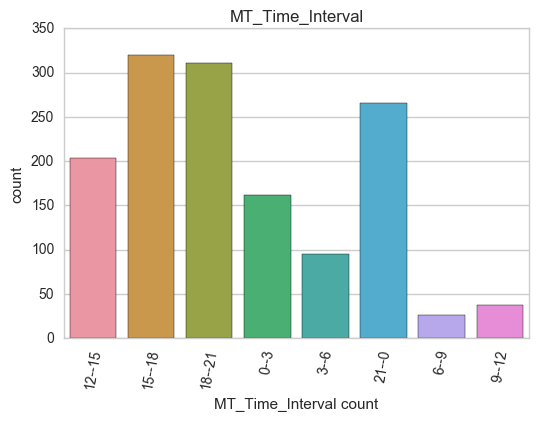

In [325]:
# Which time interval has the most reserved trips
sns.countplot(x='MT_Time_Interval', data=train_july)
plt.xticks(rotation=80)
plt.xlabel('MT_Time_Interval count')
plt.title('MT_Time_Interval')
plt.show()

There are more reserved trips made during 12:00pm to 03:00am. So more customer support would be helpful in increasing the reservation times during that time. Also, more promotion or advertising can be designed for that time period.

In [351]:
# Now let's analyze HOURCAR has more short time period trips or long time period trips.
RL_cnt = train_july['Reservation_length'].value_counts()
print(RL_cnt)
# plt.scatter(range(train_july.shape[0]), np.sort(train_july['Reservation_length']))
# plt.xlabel('Index', fontsize=12)
# plt.ylabel('Reservation_length', fontsize=12)
# plt.show()

TM_cnt = train_july['Trip_Mileage'].value_counts()
print(TM_cnt)
# plt.scatter(range(train_july.shape[0]), np.sort(train_july['Trip_Mileage']))
# plt.xlabel('Index', fontsize=12)
# plt.ylabel('Trip_Mileage', fontsize=12)
# plt.show()

120.0     143
90.0      124
60.0      122
150.0     100
180.0      93
135.0      77
30.0       75
75.0       75
1440.0     65
105.0      58
45.0       54
210.0      52
240.0      47
165.0      46
195.0      36
270.0      27
225.0      25
255.0      25
300.0      24
360.0      19
375.0      12
345.0      11
330.0      10
285.0       9
315.0       8
420.0       8
480.0       8
390.0       7
405.0       5
450.0       5
         ... 
645.0       3
720.0       3
465.0       3
435.0       3
600.0       2
690.0       2
540.0       2
750.0       2
1425.0      2
1290.0      1
960.0       1
615.0       1
1110.0      1
1020.0      1
795.0       1
900.0       1
570.0       1
1275.0      1
1380.0      1
1410.0      1
1140.0      1
705.0       1
1065.0      1
840.0       1
495.0       1
555.0       1
735.0       1
990.0       1
765.0       1
810.0       1
Name: Reservation_length, dtype: int64
0      71
4      69
7      53
12     51
9      50
14     46
10     46
5      45
8      45
6      40
13     

From the scatter plot and value counts summay, it seems like that both short time period trips and long time period trips are also popluar in HOURCAR.

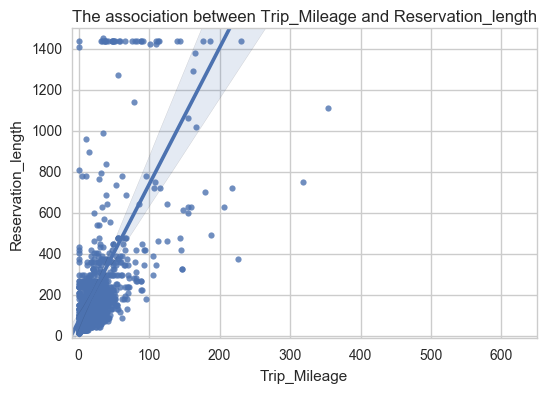

In [327]:
# Let's examine the correlation between Trip_Mileage and Reservation_length
sns.regplot(x='Trip_Mileage',y='Reservation_length', fit_reg=True,  data=train_july)
plt.xlim(-10,650)
plt.ylim(-10,1500)
plt.xlabel("Trip_Mileage")
plt.ylabel("Reservation_length")
plt.title("The association between Trip_Mileage and Reservation_length")
plt.show()
# Obviously, there is a significantly positive relation between Trip_Mileage and Reservation_length. As the Reservation_length 
# goes longer, Trip_Mileage gets longers as well.

Now let's examine the correlation between cost of trip and trip profile (Reservation_length, time of day, Trip_Mileage, station, etc).

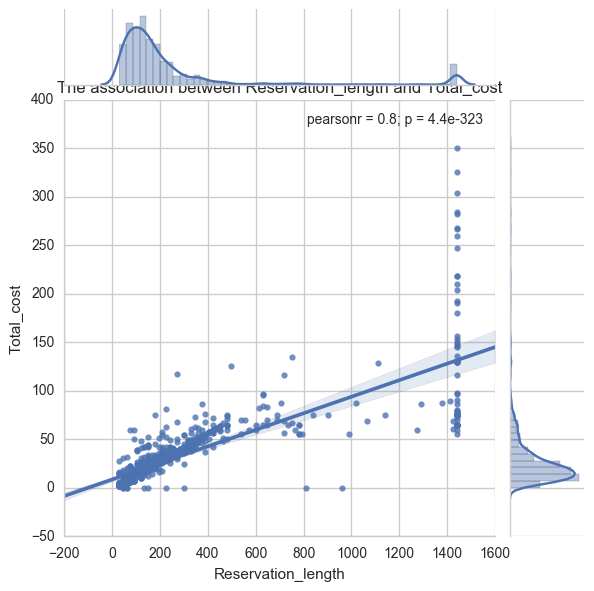

In [328]:
# Examine the correlation between cost of trip and Reservation_length
# Remove some outliers of Reservation_length
ulimit = np.percentile(train_july['Reservation_length'].values, 97) #select the 99th value of logerror
llimit = np.percentile(train_july['Reservation_length'].values, 3)  ##select the 1st value of logerror
train_july['Reservation_length'].ix[train_july['Reservation_length']>ulimit] = ulimit #replace the value that greater than ulimit to ulimit
train_july['Reservation_length'].ix[train_july['Reservation_length']<llimit] = llimit ##replace the value that less than llimit to llimit
sns.jointplot(x='Reservation_length',y='Total_cost',  data=train_july,kind='reg')
plt.xlabel("Reservation_length")
plt.ylabel("Total_cost")
plt.title("The association between Reservation_length and Total_cost")
plt.show()
# We remove some outliers in this plot to get a more clear view on the trend between these two variables.
# Obviously, there is a positive relationship between reservation length and cost, the longer time they reserve, 
# the more they need to pay

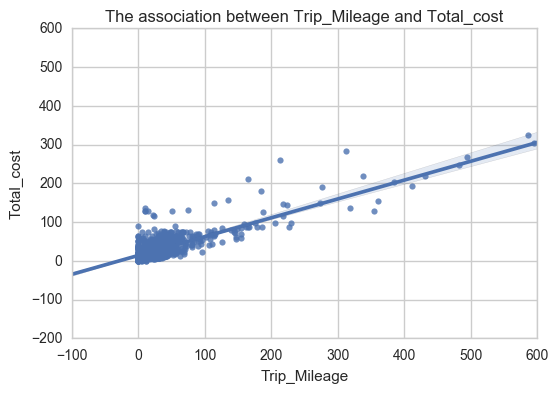

In [329]:
# Examine the correlation between cost of trip and Trip_Mileage
# Remove some outliers of Trip_Mileage
# ulimit = np.percentile(train_july['Trip_Mileage'].values, 98) #select the 99th value of logerror
# llimit = np.percentile(train_july['Trip_Mileage'].values, 2)  ##select the 1st value of logerror
# train_july['Trip_Mileage'].ix[train_july['Trip_Mileage']>ulimit] = ulimit #replace the value that greater than ulimit to ulimit
# train_july['Trip_Mileage'].ix[train_july['Trip_Mileage']<llimit] = llimit ##replace the value that less than llimit to llimit
sns.regplot(x='Trip_Mileage',y='Total_cost', fit_reg=True,  data=train_july)
plt.xlim(-100, 600)
plt.xlabel("Trip_Mileage")
plt.ylabel("Total_cost")
plt.title("The association between Trip_Mileage and Total_cost")
plt.show()
# We remove some outliers in this plot to get a more clear view on the trend between these two variables.
# Obviously, there is a positive relationship between mileage and cost, the longer distance they drive, the more they need to pay.

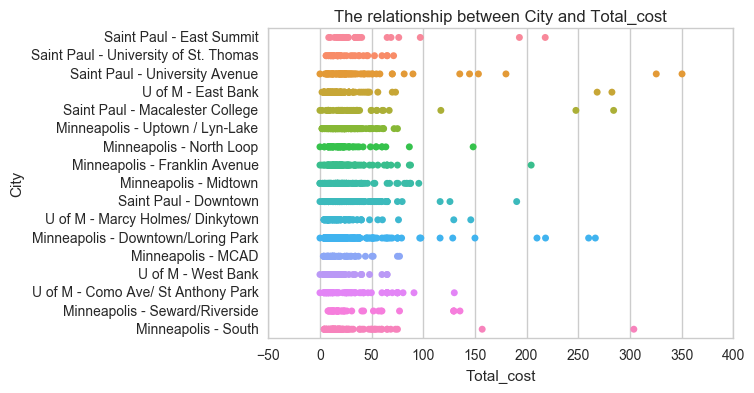

In [330]:
# Examine the correlation between cost of trip and City
sns.stripplot(x='Total_cost', y='City',data=train_july)
# plt.ylim(0, 200)
# plt.xticks(rotation=80)
plt.xlabel('Total_cost')
plt.ylabel('City')
plt.title('The relationship between City and Total_cost')
plt.show()
# Basically, the cost of trip lies between $0 and $150. There is no certain cities that have much higher cost than the others.

Now let's examine the correlation between membership plan types and trip profile 
(Reservation_length, time of day, Trip_Mileage, station, etc).

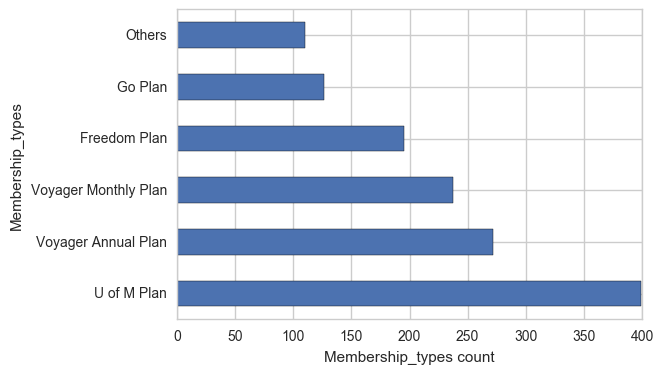

In [350]:
# Have a review of the most popular membership plan types
Membership_cnt = train_july['Membership_types'].value_counts()
ax = Membership_cnt.iloc[:6].plot(kind="barh")
plt.ylabel('Membership_types')
plt.xlabel('Membership_types count')
plt.show()

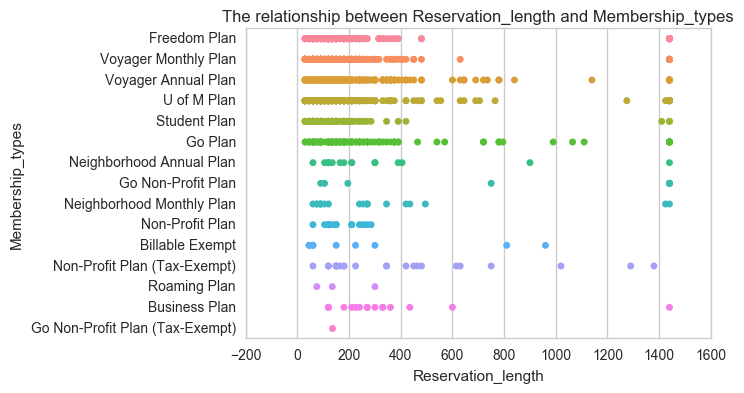

In [332]:
# Examine the correlation between Membership_types and Reservation_length
sns.stripplot(x='Reservation_length', y='Membership_types',data=train_july)
plt.xlabel('Reservation_length')
plt.ylabel('Membership_types')
plt.title('The relationship between Reservation_length and Membership_types')
plt.show()
# We couldn't find a certain pattern between these two variabls.

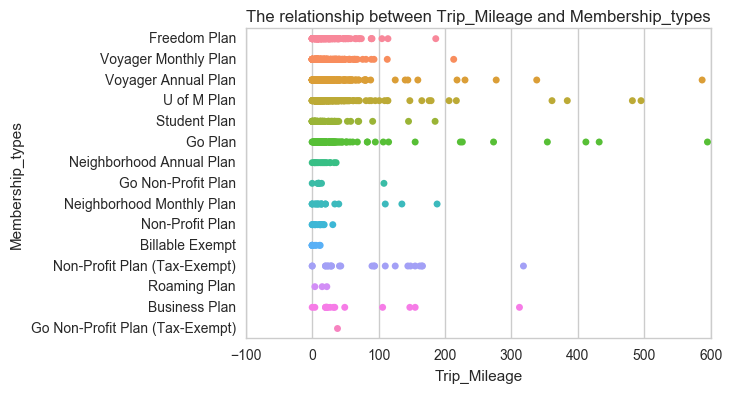

In [333]:
# Examine the correlation between Membership_types and Trip_Mileage
sns.stripplot(x='Trip_Mileage', y='Membership_types',data=train_july)
plt.xlim(-100, 600)
# plt.xticks(rotation=80)
plt.xlabel('Trip_Mileage')
plt.ylabel('Membership_types')
plt.title('The relationship between Trip_Mileage and Membership_types')
plt.show()
# We couldn't find a certain pattern between these two variabls.

In [334]:
MT_array = train_july['Membership_types'].values
MT_list = MT_array.tolist()
# print(C_list)
for i in range(0,len(MT_list)) :
    if (MT_list[i] != 'U of M Plan' and MT_list[i] != 'Voyager Annual Plan' and MT_list[i] != 'Voyager Monthly Plan'
        and MT_list[i] != 'Freedom Plan' and MT_list[i] != 'Go Plan' and MT_list[i] != 'Student Plan') :
        MT_list[i] = 'Others'
train_july['Membership_types'] = [elem for elem in MT_list]
# print(train_july['Membership_types'])


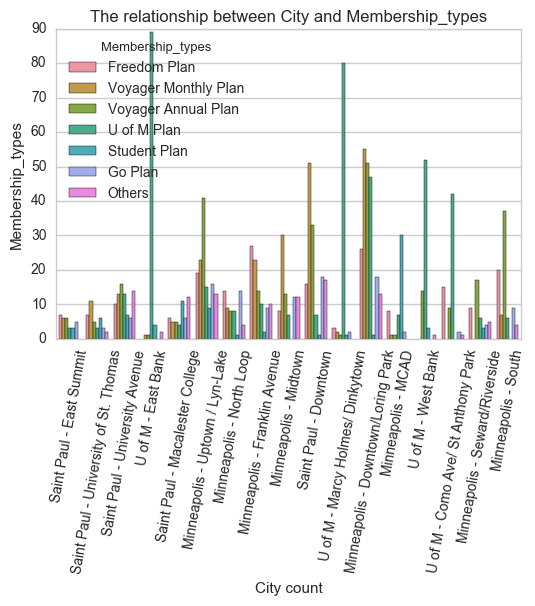

In [335]:
# Examine the correlation between cost of trip and City
sns.countplot(x='City', data=train_july,hue='Membership_types')
plt.xticks(rotation=80)
plt.xlabel('City count')
plt.ylabel('Membership_types')
plt.title('The relationship between City and Membership_types')
plt.show()
# Apparently, some cities has a preferable membership plan type taken. HOURCAR can make use of this information to promote differnt
# advertising in different cities.

Now, let's explore how many trips are taken at each time interval at each location. First let's do some manipulation on the location and city. We will filter some useful cities and locations for further analysis.

Minneapolis - Downtown/Loring Park    211
Saint Paul - Downtown                 143
Minneapolis - Uptown / Lyn-Lake       136
U of M - East Bank                     97
Minneapolis - Franklin Avenue          95
U of M - Marcy Holmes/ Dinkytown       89
Minneapolis - South                    83
Minneapolis - Midtown                  82
Saint Paul - University Avenue         79
U of M - West Bank                     70
U of M - Como Ave/ St Anthony Park     69
Minneapolis - North Loop               58
Name: City, dtype: int64


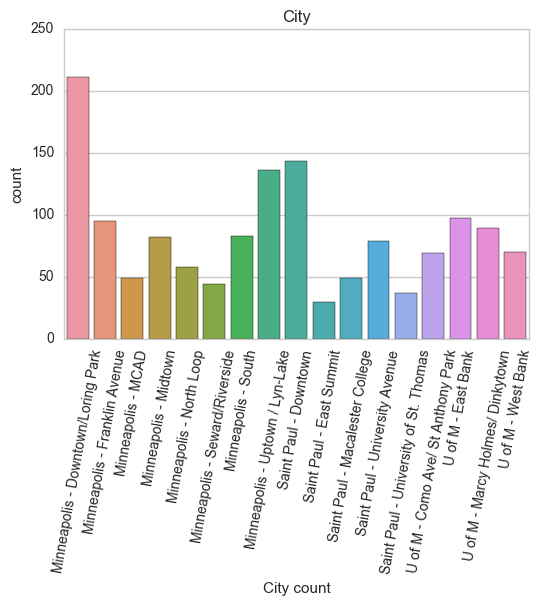

In [336]:
# Explore location and city
city_cnt = train_july['City'].value_counts()
print(city_cnt[city_cnt>50])

sns.countplot(x=np.sort(train_july['City']))
plt.xticks(rotation=80)
plt.xlabel('City count')
plt.title('City')
plt.show()
#Ａｍｏｎｇ　ａｌｌ　ｔｈｅ　ｃｉｔｉｅｓ，　Saint Paul - Downtown，Minneapolis - Franklin Avenue，U of M - East Bank，Minneapolis - Downtown/Loring Park
# , U of M - Marcy Holmes/ Dinkytown,Minneapolis - Uptown / Lyn-Lake have more customers than other cities.
# Maybe more promotions need to be put in these cities to attract more customers.

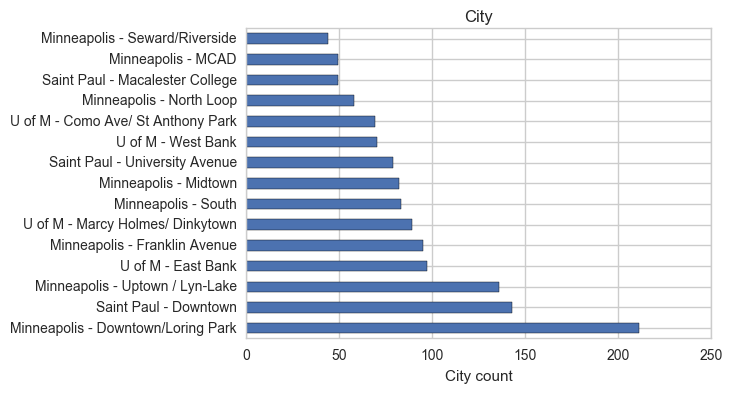

In [337]:
ax = city_cnt.iloc[:15].plot(kind="barh")
plt.xlabel('City count')
plt.title('City')
plt.show()

In [338]:
C_array = train_july['City'].values
C_list = C_array.tolist()
# print(C_list)
for i in range(0,len(C_list)) :
    if (C_list[i] != 'Minneapolis - Downtown/Loring Park' and C_list[i] != 'Saint Paul - Downtown' and C_list[i] != 'Minneapolis - Uptown / Lyn-Lake'
        and C_list[i] != 'U of M - East Bank' and C_list[i] != 'Minneapolis - Franklin Avenue' and C_list[i] != 'U of M - Marcy Holmes/ Dinkytown' 
        and C_list[i] != 'Minneapolis - South' and C_list[i] != 'Minneapolis - Midtown'  and C_list[i] != 'Saint Paul - University Avenue' 
        and C_list[i] != 'U of M - West Bank' and C_list[i] != 'U of M - Como Ave/ St Anthony Park') :
        C_list[i] = 'Others'
train_july['City'] = [elem for elem in C_list]
print(train_july['City'])

0                                   Others
1                                   Others
2           Saint Paul - University Avenue
3                       U of M - East Bank
4                                   Others
5          Minneapolis - Uptown / Lyn-Lake
6                                   Others
7            Minneapolis - Franklin Avenue
8                    Minneapolis - Midtown
9                    Saint Paul - Downtown
10         Minneapolis - Uptown / Lyn-Lake
11          Saint Paul - University Avenue
12         Minneapolis - Uptown / Lyn-Lake
15           Minneapolis - Franklin Avenue
16        U of M - Marcy Holmes/ Dinkytown
17        U of M - Marcy Holmes/ Dinkytown
18      Minneapolis - Downtown/Loring Park
19        U of M - Marcy Holmes/ Dinkytown
20          Saint Paul - University Avenue
21                                  Others
22      Minneapolis - Downtown/Loring Park
23                   Minneapolis - Midtown
24                      U of M - West Bank
25        U

Oak Grove St and Spruce Place                87
Seven Corners Apartments                     56
Nicollet and Groveland                       50
Macalester College - Grand Ave               49
MCAD                                         49
Lowertown - 7th St E and Wall                41
Frontier Hall                                37
Nighthawks - Nicollet Ave S and W 38th St    36
Calhoun Square Ramp                          36
Dinkytown - 6th St SE and 13th Ave SE        35
Block 19 Ramp                                34
Wedge Co-op                                  33
Plaza Verde - Lake St and 15th  Ave S        31
222 Hennepin - Hennepin and 2nd St N         31
Name: Location, dtype: int64


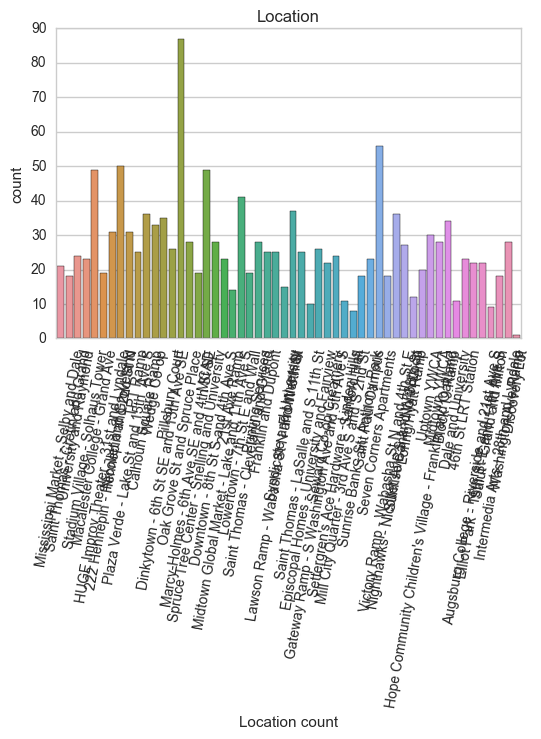

In [339]:
location_cnt = train_july['Location'].value_counts()
print(location_cnt[location_cnt>30])

sns.countplot(x='Location', data=train_july)
plt.xticks(rotation=80)
plt.xlabel('Location count')
plt.title('Location')
plt.show()

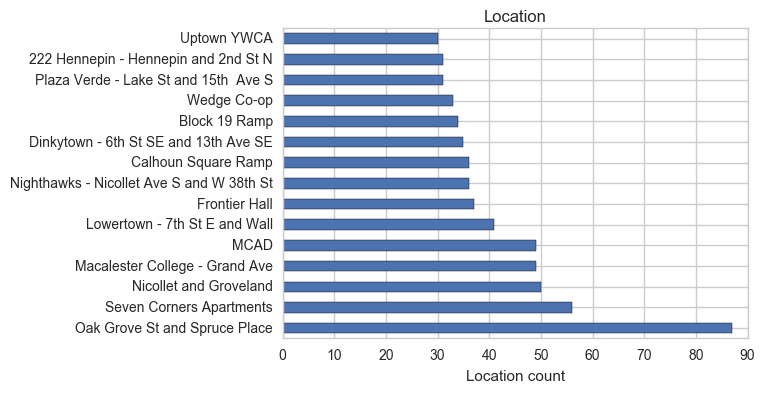

In [340]:
ax = location_cnt.iloc[:15].plot(kind="barh")
plt.xlabel('Location count')
plt.title('Location')
plt.show()

In [341]:
L_array = train_july['Location'].values
L_list = L_array.tolist()
# print(C_list)
for i in range(0,len(L_list)) :
    if (L_list[i] != 'Oak Grove St and Spruce Place' and L_list[i] != 'Seven Corners Apartments' and L_list[i] != 'Nicollet and Groveland'
        and L_list[i] != 'Macalester College - Grand Ave' and L_list[i] != 'MCAD' and L_list[i] != 'Lowertown - 7th St E and Wall' 
        and L_list[i] != 'Frontier Hall' and L_list[i] != 'Nighthawks - Nicollet Ave S and W 38th St' and L_list[i] != 'Calhoun Square Ramp' 
        and L_list[i] != 'Dinkytown - 6th St SE and 13th Ave SE' and L_list[i] != 'Block 19 Ramp' and L_list[i] != 'Block 19 Ramp' 
        and L_list[i] != 'Wedge Co-op' and L_list[i] != 'Plaza Verde - Lake St and 15th  Ave S' and L_list[i] != '222 Hennepin - Hennepin and 2nd St N') :
        L_list[i] = 'Others'
train_july['Location'] = [elem for elem in L_list]
# print(train_july['Location'])

In [342]:
ZC_cnt = train_july['ZIP_Code'].value_counts()
# print(ZC_cnt)
columns = ['ZIP_Code','Location','City']
location_df = pd.DataFrame(train_july, columns=columns)
location_df = location_df.drop_duplicates()
print(location_df)

# We get the zip code for different locations in the same or in different cities. For thoes cities that have relatively high number 
# of trips taken record, it is possible to set a station there for one-way approach. However, it is negotiable to set the station 
# at which zip code area. Because some of those cities have more than one locations shown in the below statics.

        ZIP_Code                               Location  \
0          55102                                 Others   
1          55105                                 Others   
2          55114                                 Others   
3          55414                                 Others   
4          55105         Macalester College - Grand Ave   
5          55408                                 Others   
6          55401   222 Hennepin - Hennepin and 2nd St N   
7          55405                 Nicollet and Groveland   
8          55407                                 Others   
9          55101                                 Others   
10         55409                    Calhoun Square Ramp   
11         55104                                 Others   
12         55405                            Wedge Co-op   
15         55403                 Nicollet and Groveland   
16         55414  Dinkytown - 6th St SE and 13th Ave SE   
17         55414                                 Others 

Then we will compute some certain time intervals for Reservation_From_Time .

In [343]:
RFT_array = train_july['Reservation_From_Time'].values
RFT_list = RFT_array.tolist()
print(len(RFT_list))

FT_list = []
# print(min(new_list))
# print(max(new_list))

1421


In [344]:

for i in range(0,len(RFT_list)) :
#     print(new_list[i])
    if RFT_list[i] <= Three_hour_timestamps[0] :
#         print(Three_hour_timestamps[0])
        FT_list.append('0--3') 
    elif RFT_list[i] <= Three_hour_timestamps[1] :
#         print(Three_hour_timestamps[1])
        FT_list.append('3--6')
    elif RFT_list[i] <= Three_hour_timestamps[2] :
#         print(Three_hour_timestamps[2])
        FT_list.append('6--9')
    elif RFT_list[i] <= Three_hour_timestamps[3] :
#         print(Three_hour_timestamps[3])
        FT_list.append('9--12')
    elif RFT_list[i] <= Three_hour_timestamps[4] :
#         print(Three_hour_timestamps[4])
        FT_list.append('12--15')
    elif RFT_list[i] <= Three_hour_timestamps[5] :
#         print(Three_hour_timestamps[5])
        FT_list.append('15--18')
    elif RFT_list[i] <= Three_hour_timestamps[6] :
#         print(Three_hour_timestamps[6])
        FT_list.append('18--21')
    else:
        FT_list.append('21--0')
# print(FT_list)
print(len(FT_list))
train_july['Time_Interval'] = [elem for elem in FT_list]
# print(train_july['Time_Interval'])

1421


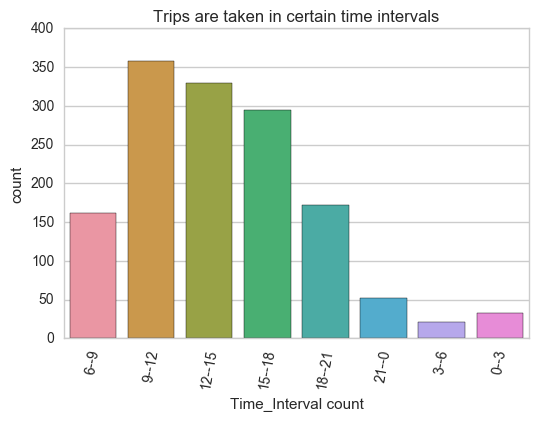

In [345]:
# Which time interval has the most customers
sns.countplot(x='Time_Interval', data=train_july)
plt.xticks(rotation=80)
plt.xlabel('Time_Interval count')
plt.title('Trips are taken in certain time intervals')
plt.show()
# Obviously, customer prefer to use the car from 9am to 18pm.

In [346]:
# We will only ananlyz time from 6am to 21pm.
for i in range(0,len(FT_list)) :
    if FT_list[i] == '21--0' :
        FT_list[i] = 'Other'
    elif FT_list[i] == '3--6' :
        FT_list[i] = 'Other'
    elif FT_list[i] == '0--3' :
        FT_list[i] = 'Other'
train_july['Time_Interval'] = [elem for elem in FT_list]
# print(train_july['Time_Interval'])

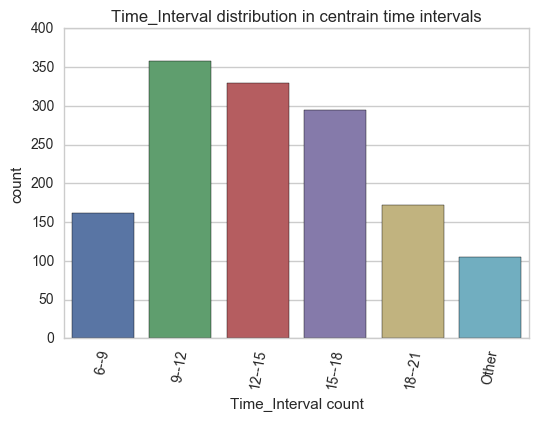

In [347]:
# Which time interval has the most customers
sns.countplot(x='Time_Interval', data=train_july)
plt.xticks(rotation=80)
plt.xlabel('Time_Interval count')
plt.title('Time_Interval distribution in centrain time intervals')
plt.show()
# Obviously, customer prefer to use the car from 9am to 18pm.

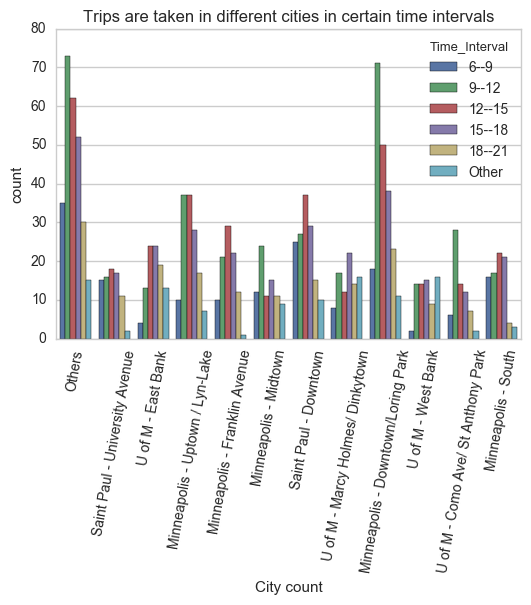

In [348]:
# How many trips are taken in different cities in certain time intervals.
sns.countplot(x='City', data=train_july,hue='Time_Interval')
plt.xticks(rotation=80)
plt.xlabel('City count')
plt.title('Trips are taken in different cities in certain time intervals')
plt.show()
# As we can see from the plot below, different cities have certain preferable reserved from time. HOURCAR can anticipate their 
# car inventory in different cities to meet customers need.

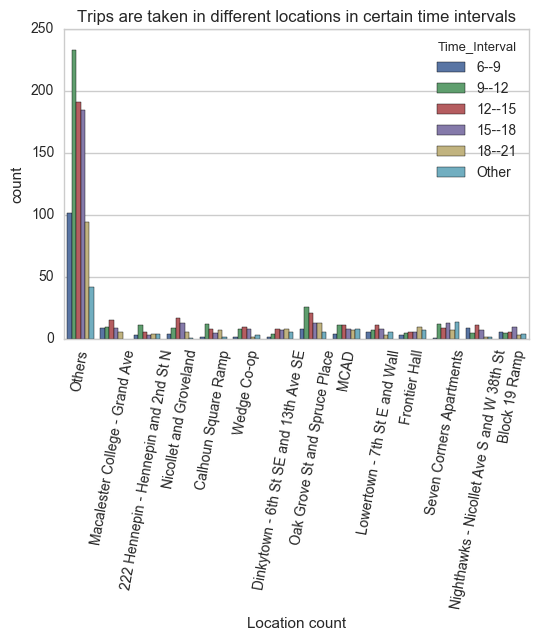

In [349]:
# How many trips are taken in different locations in certain time intervals.
sns.countplot(x='Location', data=train_july,hue='Time_Interval')
plt.xticks(rotation=80)
plt.xlabel('Location count')
plt.title('Trips are taken in different locations in certain time intervals')
plt.show()
# Since we have so many locations, even we select those with higher tipers taken, the sum of the reamings trips taken 
# in other locations are still large. So we prefer to use 